In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.metrics import silhouette_score

In [2]:
milk = pd.read_csv('milk.csv',index_col=0)

In [3]:
milk.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [4]:
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)

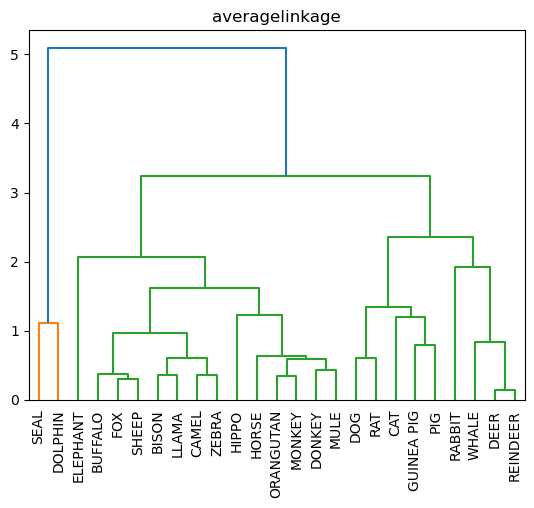

In [5]:
link="average"
mergings = linkage(milk_scaled,method=link)
dendrogram(mergings,labels=list(milk_scaled.index))
plt.title(link+'linkage')
plt.xticks(rotation=90)
plt.show()

In [6]:
mergings  # This are distances stored from each point and then according to this when we pass it to the dendrogram the distances are calculated

array([[20.        , 21.        ,  0.14557691,  2.        ],
       [10.        , 15.        ,  0.30903062,  2.        ],
       [ 1.        ,  2.        ,  0.34704952,  2.        ],
       [ 6.        , 11.        ,  0.35975407,  2.        ],
       [ 5.        , 14.        ,  0.36090936,  2.        ],
       [ 7.        , 26.        ,  0.36925133,  3.        ],
       [ 3.        , 12.        ,  0.42572471,  2.        ],
       [27.        , 31.        ,  0.5853266 ,  4.        ],
       [28.        , 29.        ,  0.59940787,  4.        ],
       [16.        , 19.        ,  0.61176231,  2.        ],
       [ 0.        , 32.        ,  0.62923999,  5.        ],
       [ 8.        , 13.        ,  0.78713165,  2.        ],
       [22.        , 25.        ,  0.83150788,  3.        ],
       [30.        , 33.        ,  0.97124069,  7.        ],
       [23.        , 24.        ,  1.10551437,  2.        ],
       [ 9.        , 36.        ,  1.20249687,  3.        ],
       [ 4.        , 35.

#### Evaluate silhouette_score for different number of factors

In [7]:
scores = []
n_clust = [2,3,4,5]
for i in n_clust:
    clust = AgglomerativeClustering(n_clusters=i,linkage='average')
    clust.fit(milk_scaled)
    scores.append(silhouette_score(milk_scaled,clust.labels_))
print(scores)
i_max = np.argmax(scores)
print("Best no. of Clusters: ",n_clust[i_max])

[0.5186847578981009, 0.48757649189546187, 0.41601538367376095, 0.3830100222472541]
Best no. of Clusters:  2


In [8]:
clust = AgglomerativeClustering(n_clusters=2,linkage='average')
clust.fit(milk_scaled)
silhouette_score(milk_scaled,clust.labels_)


0.5186847578981009

In [9]:
df_clust = pd.DataFrame({'Animal':list(milk_scaled.index),'cluster':list(clust.labels_)})

In [10]:
df_clust.sort_values('cluster')

,Animal,cluster
0,HORSE,0
22,WHALE,0
21,REINDEER,0
20,DEER,0
19,RAT,0
18,RABBIT,0
17,ELEPHANT,0
16,DOG,0
15,SHEEP,0
14,ZEBRA,0
